In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px


from column_functions import Calculations as clc
from column_functions import Figures as figures
from data_functions import DataFunctions as dfс
from equipment_functions import Calculations as eq

In [2]:
am = pd.read_excel('data/atomic_mass.xlsx')
aqua_liquid_saturation = pd.read_excel('data/ph_H2O_saturation_liquid.xlsx')
aqua_vapor_saturation = pd.read_excel('data/ph_H2O_saturation_gas.xlsx')
aqua_vapor_saturation_by_pressure = pd.read_excel('data/ph_H2O_saturation_gas_by_pressure.xlsx')
mass_concentration_solution = pd.read_excel('data/mass_concentration_solution.xlsx')
boiling_point_solution = pd.read_excel('data/boiling_point_solution.xlsx')
density_solution = pd.read_excel('data/density_solution.xlsx')
vicosity_solution = pd.read_excel('data/vicosity_solution.xlsx')
specific_heat_capacity_solution = pd.read_excel('data/heat_capacity_solution.xlsx')
thermal_conductivity_solutions = pd.read_excel('data/thermal_conductivity_solutions.xlsx')
ph_gases = pd.read_excel('data/ph_gases.xlsx')
ph_organic = pd.read_excel('data/ph_organic.xlsx')
density_organic_liquid = pd.read_excel('data/density_organic_liquid.xlsx')
vicosity_organic_liquid = pd.read_excel('data/vicosity_organic_liquid.xlsx')
interfactial_tension_organic_liquid = pd.read_excel('data/interfacial_tension_organic_liquid.xlsx')
thermal_expansion_organic_liquid = pd.read_excel('data/thermal_expansion_organic_liquid.xlsx')
heat_capacity_organic_liquid = pd.read_excel('data/heat_capacity_organic_liquid.xlsx')
thermal_conductivity_organic_liquid = pd.read_excel('data/thermal_conductivity_organic_liquid.xlsx')
heat_vaporization_organic_liquid = pd.read_excel('data/heat_vaporization_organic_liquid.xlsx')
vapor_pressure_organic_liquid = pd.read_excel('data/vapor_pressure_organic_liquid.xlsx')
vicosity_organic_vapor = pd.read_excel('data/vicosity_organic_vapor.xlsx')

In [3]:
exclude_list =['salts','name','formula','salt']
#Поверхностное натяжение органических жидкостей [мДж/м^2]
interfactial_tension_organic_liquid = dfс.delete_hyphens(interfactial_tension_organic_liquid,exclude_list)

#Теплопроводность органических жидкостей [Вт/(м*K)]
thermal_conductivity_organic_liquid = dfс.delete_hyphens(thermal_conductivity_organic_liquid,exclude_list)

#Свойства водяного пара в состянии насыщения в зависимости от давления
aqua_vapor_saturation_by_pressure = dfс.delete_hyphens(aqua_vapor_saturation_by_pressure,exclude_list)

#Коэффициенты объемного теплового расширения органических жидкостей b*10^3, K^-1
thermal_expansion_organic_liquid = dfс.delete_hyphens(thermal_expansion_organic_liquid,exclude_list)

#Теплота парообразования органических жидкостей [кДж/кг]
heat_vaporization_organic_liquid = dfс.delete_hyphens(heat_vaporization_organic_liquid,exclude_list)

#Удельная  теплоемкость водных р-ров cp = cpAQ - w * (d1 - d2*w -d3e-3 *t^2)
specific_heat_capacity_solution = dfс.delete_hyphens(specific_heat_capacity_solution,exclude_list)

#Теплопроводность водных р-ров неорганических соединений lya = lyaAQ * (1 - f*w)
thermal_conductivity_solutions = dfс.delete_hyphens(thermal_conductivity_solutions,exclude_list)

#Давление насыщенного пара [мм.рт.ст.] над органической жидкостью
vapor_pressure_organic_liquid = dfс.delete_hyphens(vapor_pressure_organic_liquid,exclude_list)

#Удельная теплоемкость [Дж/(кг*K)] органических жидкостей
heat_capacity_organic_liquid = dfс.delete_hyphens(heat_capacity_organic_liquid,exclude_list)

#Концентрации насыщенных водных растворов неорганических веществ кг/кг при °С
mass_concentration_solution = dfс.delete_hyphens(mass_concentration_solution,exclude_list)

#Динамическая вязкость органических жидкостей [мПа*с]
vicosity_organic_liquid = dfс.delete_hyphens(vicosity_organic_liquid,exclude_list)

#Плотность органических жидкостей [кг/м^3]
density_organic_liquid = dfс.delete_hyphens(density_organic_liquid,exclude_list)

#Температуры кипения водных растворов неорганических веществ при н.у.
boiling_point_solution = dfс.delete_hyphens(boiling_point_solution,exclude_list)

#Физические свойства воды на линии насыщения
aqua_liquid_saturation = dfс.delete_hyphens(aqua_liquid_saturation,exclude_list)

#Вязкость паров органических веществ [мкПа*с]
vicosity_organic_vapor = dfс.delete_hyphens(vicosity_organic_vapor,exclude_list)

#Свойства водяного пара в состянии насыщения в зависимости от температуры
aqua_vapor_saturation = dfс.delete_hyphens(aqua_vapor_saturation,exclude_list)

#Вязкость водных растворов неорганических веществ u = uaq*exp^[w(b1 + b2e-2 * t - b3e-7 * t^2)]
vicosity_solution = dfс.delete_hyphens(vicosity_solution,exclude_list)

#Плотность водных растворов p = paq*exp^[w*(a1 + a2e-4 * t - a3e-6 * t^2)], w[кг/кг], t[°C], p[кг/м^3], u[Па*c]
density_solution = dfс.delete_hyphens(density_solution,exclude_list)

#Основные характеристики органических веществ
ph_organic = dfс.delete_hyphens(ph_organic,exclude_list)

#Свойства газов при н.у.
ph_gases = dfс.delete_hyphens(ph_gases,exclude_list)
#am = delete_hyphens(am)

In [4]:
class Сomponent():
                
    def __init__(self, name):        
        self.interfactial_tension_organic_liquid = interfactial_tension_organic_liquid[interfactial_tension_organic_liquid['name'] == name].drop('name', axis=1)
        self.thermal_conductivity_organic_liquid = thermal_conductivity_organic_liquid[thermal_conductivity_organic_liquid['name'] == name].drop('name', axis=1)
        self.thermal_expansion_organic_liquid = thermal_expansion_organic_liquid[thermal_expansion_organic_liquid['name'] == name].drop('name', axis=1)
        self.heat_vaporization_organic_liquid = heat_vaporization_organic_liquid[heat_vaporization_organic_liquid['name'] == name].drop('name', axis=1)        
        self.vapor_pressure_organic_liquid = vapor_pressure_organic_liquid[vapor_pressure_organic_liquid['name'] == name].drop('name', axis=1)
        self.heat_capacity_organic_liquid = heat_capacity_organic_liquid[heat_capacity_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_liquid = vicosity_organic_liquid[vicosity_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_liquid = vicosity_organic_liquid[vicosity_organic_liquid['name'] == name].drop('name', axis=1)
        self.density_organic_liquid = density_organic_liquid[density_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_vapor = vicosity_organic_vapor[vicosity_organic_vapor['name'] == name].drop('name', axis=1)
        self.ph_organic = ph_organic[ph_organic['name'] == name]

Ниже в поле Substance присвойте компонентам 'А' и 'В' имена веществ, смесь которых необходимо разделить. Например 'Толуол', 'Бензол', 'Этанол', 'Тетрахлорметан' и др. Полный список веществ в базе можно узнать ниже.

Из этой пары компонент 'A' должен иметь меньшую темперутуру плавления 'melting_point'. 
 
Для пар веществ должна быть таблица с экспериментальными даннымив папке 'l_v' заполненная как в образцах. Найти интересующую смесь можно в справочном пособии Коган, Фридман, Кафаров "Равновесие между жидкостью и паром" источник указан в файле README. Некоторые смеси находятся в примерах. 

Соотнесите 'formula' из базы данных с названием файла в папке 'l_v'. Например:

этанол-бутанол(C2H5OH-C4H9OH); толуол-тетрахлорметан; бензол-толуол; метанол-этанол;метилацетат-бензол; метанол-изопропанол(CH3OH-C3H7OH); гексан-толуол(C6H14-C6H5CH3); ацетон-уксусная кислота; хлороформ-тетрахлорметан


In [5]:
Substance = {'A':Сomponent(name='Метанол'), 'B':Сomponent(name='Этанол')}
A_name = Substance['A'].ph_organic['formula'].values
B_name = Substance['B'].ph_organic['formula'].values

ph_organic

,name,formula,molar_mass,melting_point,boiling_point,critical_point,critical_pressure
0,Анилин,C6H5NH2,93.128,-5.9,184.4,426.0,5.309
1,Ацетон,CH3COCH3,58.080,-95.4,56.2,235.5,4.701
2,Бензол,C6H6,78.114,5.5,80.1,289.4,4.894
3,Бромбензол,C6H5Br,157.010,-30.8,156.0,397.0,4.519
4,Бутанол,CH3(CH2)2CH2OH,74.123,-89.5,117.3,288.6,4.418
5,Гексан,CH3(CH2)4CH3,86.177,-95.3,68.7,234.7,2.969
6,Гептан,CH3(CH2)5CH3,100.204,-90.6,98.4,267.0,2.736
7,Дихлорэтан,ClCH2CH2Cl,98.959,-35.9,83.5,288.0,5.369
8,Изопропанол,(CH3)2CHOH,60.096,-89.5,82.4,235.6,4.762
9,о-Ксилол,C6H4(CH3)2,106.167,-25.2,144.4,358.4,3.729


В переменную diagram загружаем таблицу с данными о равновесии жидкость-пар для смеси выбранных веществ. В примере выбраны бензол и толуол, согласно базе ph_organic их формулы соответственно C6H6 и C6H5CH3.

ВАЖНО! в столбцах 'x' и 'y' значения должны быть в долях от единицы, а не в процентах. Если вдруг попалась таблица с процентами, то раскомментируем деление на 100 для каждого из столбцов.

In [6]:
diagram = pd.read_excel('l_v/CH3OH-CH3CH2OH.xlsx')

if diagram['x'].values.max() > 1:
    diagram['x'] = diagram['x']/100
    
if diagram['y'].values.max() > 1:
    diagram['y'] = diagram['y']/100
    
diagram.sort_values(by = ['t'], ascending=False,ignore_index=True, inplace=True)
xy_diagram = dfс.get_coeffs(diagram['x'], diagram['y'])
diagram

,x,y,t
0,0.000,0.000,78.3
1,0.134,0.183,76.6
2,0.242,0.326,75.0
3,0.320,0.428,73.6
4,0.401,0.529,72.3
5,0.435,0.566,71.7
6,0.542,0.676,70.0
7,0.652,0.759,68.6
8,0.728,0.813,67.7
9,0.790,0.858,66.9


Ниже представлена диаграма жидкость-пар выбранной смеси компонентов. Правая диаграма показывает как сильно состав жидкой фазы отличается от состава паровой. Серой прямой показана линия, в которой составы жидкости и пара были бы равны.

На диаграмы так же наложены линии аппроксимации данных. Если автомтически подобранные функции не пересекаются в неожиданных местах, не создают странных выбросов и вообще просто лежат на данных, полностью повторяя кривую эксперимента, то расчет будет точным и без проблем. Как правило, трудности случаются со смесями с азеотропной точкой. Если же такое встретится, то самым простым способом было бы добавить данных экспериментов в исходную таблицу. 

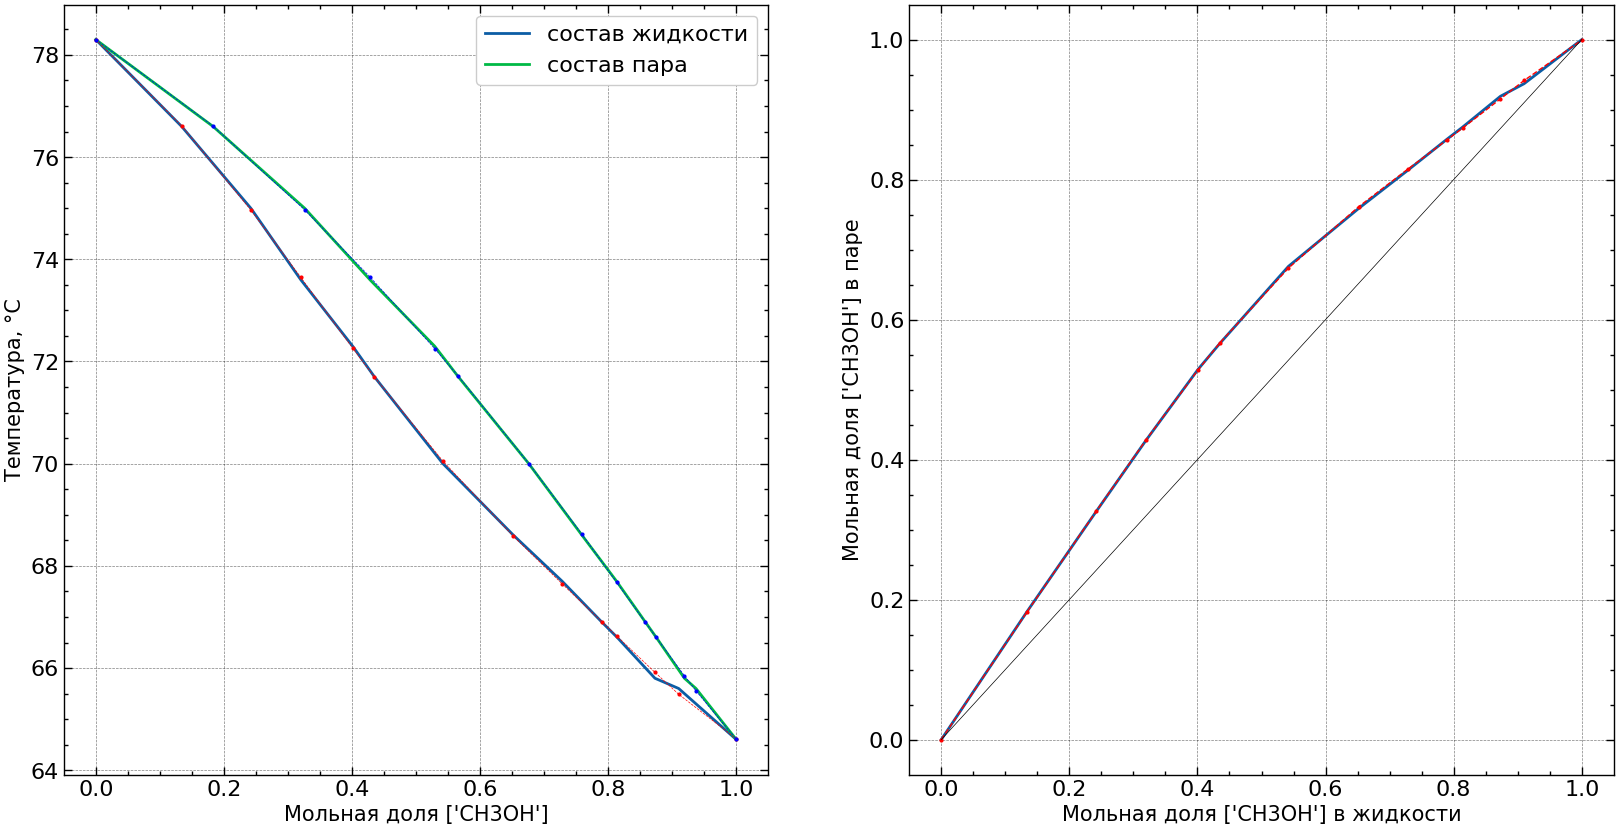

In [28]:
figures.plot_xy_diagram(diagram, A_name, plot_type='matplotlib') 
#fig.show() # если выбран plot_type='plotly'

Задаемся исходными данными на проектирование. 
1. Какой производительностью должна обладать наша колонна(поле F); Верхний предел производительности ~10кг/с. При таких объемах установка требует экстремальные требования к диаметру и высоте из каталогов ГОСТа. 
2. Какой температуры раствор подается в колонну(поле FEED_TEMPERATURE, °С);
3. Сколько в исходной смеси содержится легколетучего компонента(поле FEED, %масс);
4. Какой чистоты нужно получить дистиллят (поле DISTILLATE, в долях от единицы);
5. Какой чистоты нужно получить кубовый остаток (поле BOTTOM, в долях от единицы);
6. При каком давлении проводить процесс(PRESSURE); важно помнить, что при изменении давления внтри колонны, диаграмма равновесия жидкость-пар тоже может изменяться. Некоторые закономерности показаны в файле processing_frames

In [8]:
F = np.double(5)                  #Производительность по исходной смеси кг/с
FEED_TEMPERATURE = np.double(20)  #Начальная температура
FEED = np.double(0.35)            #В исходной смеси %масс Ллт 
DISTILLATE = np.double(0.98)      #В дистилляте(ректификате) %масс 
BOTTOM = np.double(0.017)         #В кубовом остатке %масс ллт
PRESSURE = np.double(10**5)       #Давление в колонне в Па. Влияет на коэфф. диффузии пара в колонне

balance = clc.material_balance(F, FEED, DISTILLATE, BOTTOM, xy_diagram, Substance)
balance

Ma                                                 [32.042]
Mb                                                 [46.069]
массовый расход в питателе                              5.0
массовый расход в кубовом остатке                  3.271028
массовый расход в дефлегматоре                     1.728972
xf                                     [0.4363604134614473]
xp                                     [0.9860043338430687]
xw                                   [0.024261519949267146]
yf                                      [0.568288326074045]
Rmin                                    [3.166244348878877]
dtype: object

Нагрузки по пару и жидкости определяются рабочим флегмовым числом 'R'; его оптимальное значение 'Ropt' можно найти путем технико-экономического расчета. Ввиду отсутствия надежной методики оцени 'Ropt' используют приближенные вычисления, основанные на определении коэффициента избытка флегмы (орошения). Задавшись различными значениями коэффициентов избытка флегмы β, находим соответствующие флегмовые числа. Графическим построением ступеней изменения концентраций между равновесной и рабочими линиями на диаграмме у – х найдем необходимое количество при каждом значении избытка флегмы

В функции ниже можно задать кол-во значений коэффициента избытка флегмы 'Bt_range', на основании которых будем искать оптимальное флегмовое число. 

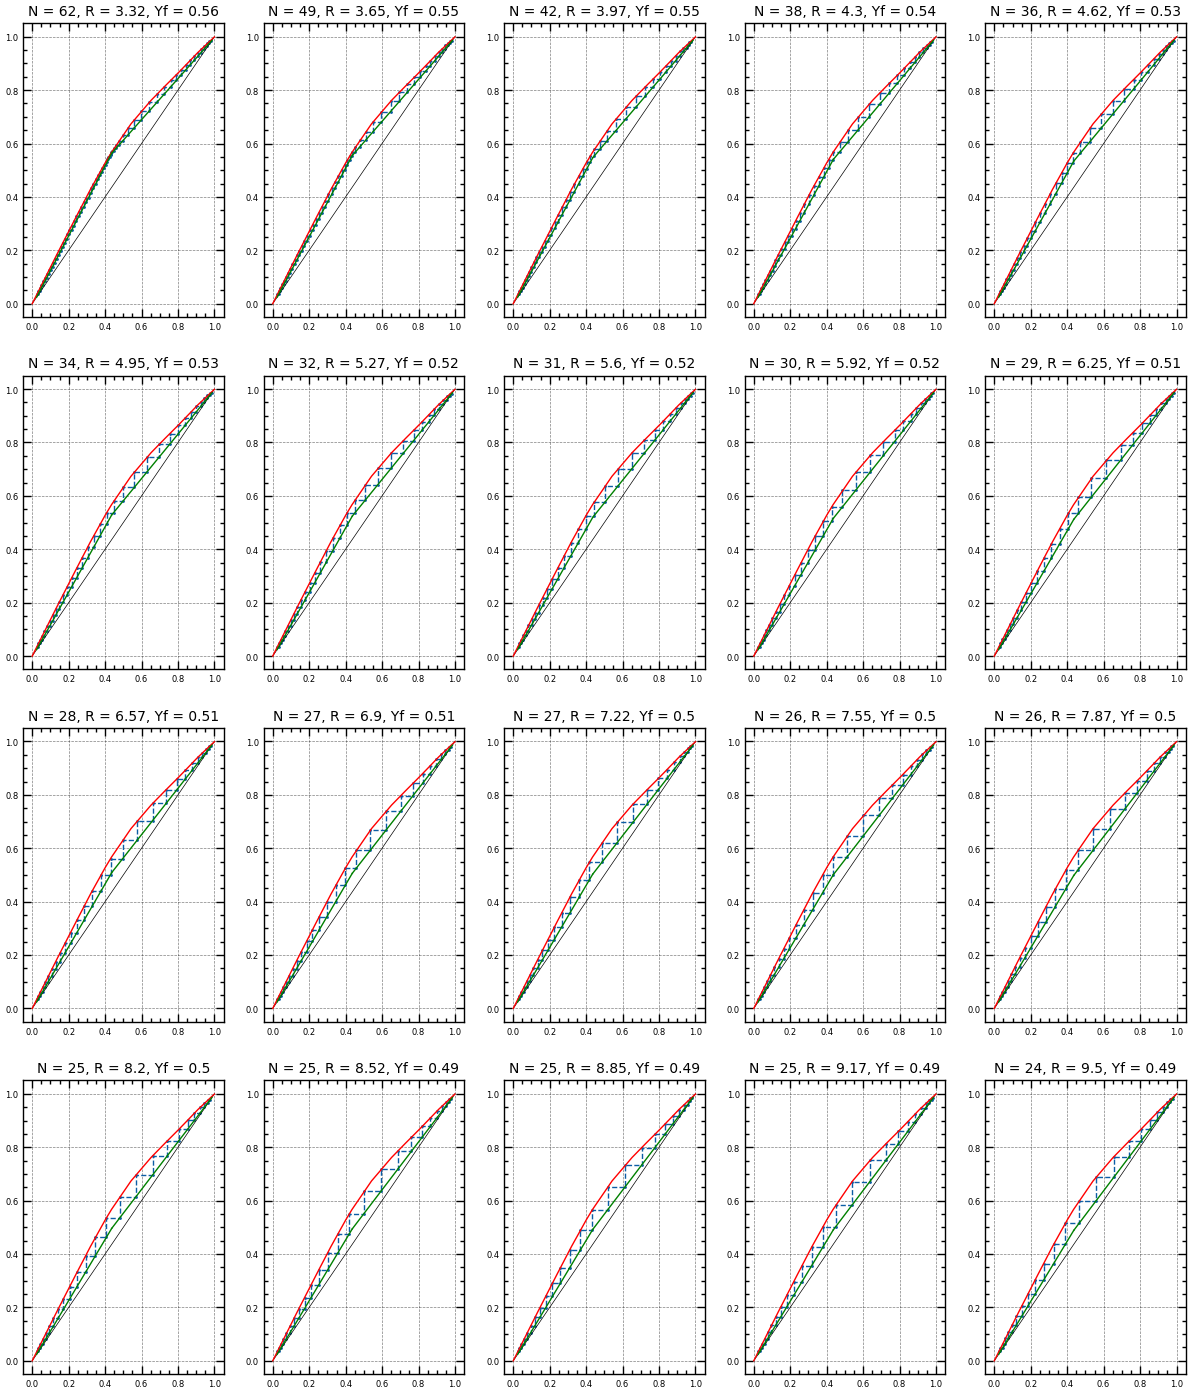

In [9]:
R, Ngraf = clc.get_range_phlegm_number(
    balance['yf'],
    balance['xw'],
    balance['xf'],
    balance['xp'],
    balance['Rmin'],
    xy_diagram,
    diagram,
    Bt_range=20,#изменяемый параметр
    plot_type='matplotlib')

На рисунке выше: 

в каждой точке коэффициента избытка флегмы находится рабочее флегмовое число 'R', по которому строится рабочая линия с координатой 'Yf'. Графическим построением ступеней 'N' изменения концентраций между равновесной и рабочими линиями на диаграмме у – х находят необходимое количество при каждом значении избытка флегмы.

На рисунке ниже:

строится график зависимости N(R + 1) = f(R). Оптимальное флегмовое число соответствует минимальному произведению N(R + 1)


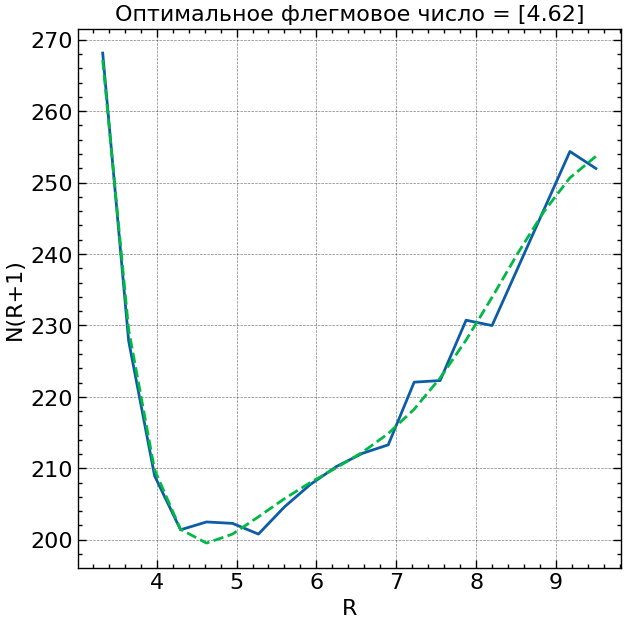

In [10]:
Ropt = clc.get_optimal_phlegm_number(R, Ngraf, plot_type='matplotlib')
#Ropt = 2.1
#Здесь можно задать любое флегмовое число, раскомментировав строку выше, и посомтреть как оно влияет на конструкцию колонны


Найдем физико-химические свойства раствора при концентрациях:

1. куба (внизу колонны, где будет собираться тяжелолетучий компонент)
2. дистиллята (вверху колонны, где будет собираться легколетучий компонент)
3. питания (в точке колонны, куда будет подаваться исходный раствор)
4. верха (среднее значение между питанием и дистиллятом)
5. низа (среднее значение между питанием и кубом)

In [11]:
properties = clc.calculate_properties(diagram, balance, Substance)
properties

,температура,содержание легколетучего в жидкости,содержание легколетучего в паре,плотность жидкости,теплопроводность жидкости,теплота парообразования жидкости,удельная теплоемкость жидкости,поверхностное натяжение жидкости,давление насыщенного пара жидкости,коэффициент объемного расширения жидкости,молярный объем газа,молярная масса жидкости,молярная масса газа,плотность пара,вязкость пара,вязкость жидкости,молярный объем жидкости
куба,78.004249,0.024262,0.04,736.889583,0.153254,847.008611,3000.728998,17.573839,761.268151,1.333551,28.796834,45.728684,45.50792,1.580310,0.010195,0.440877,62.056358
низа,75.157032,0.230311,0.31,739.721070,0.161214,899.989593,2954.852609,17.860627,776.400141,1.335670,28.563344,42.838428,41.72063,1.460635,0.010352,0.416794,57.911596
питания,71.674046,0.436360,0.57,743.132642,0.169383,954.460233,2905.508723,18.199339,762.338574,1.332597,28.277718,39.948172,38.07361,1.346417,0.010535,0.396255,53.756450
верха,67.851755,0.711182,0.80,746.819101,0.180158,1026.150737,2855.711073,18.567837,755.279546,1.334350,27.964266,36.093245,34.84740,1.246140,0.010732,0.363798,48.329301
дистиллята,64.721837,0.986004,0.99,749.749470,0.190813,1097.130679,2819.001323,18.865600,756.862224,1.341153,27.707593,32.238317,32.18227,1.161496,0.010955,0.328657,42.998786


Высоту насадки в колонне рассчитывают по модифицированному уравнению массопередачи, для которого необходимо найти общее число единиц переноса и общую высоту единицы переноса. Число единиц переноса найдем численными методом для верхней и нижней частей колонны. Общее число единиц переноса вычисляют по уравнению:
$$ n_{oy} = \int_{yw}^{yp} \frac{dy}{y^{*}-y} $$

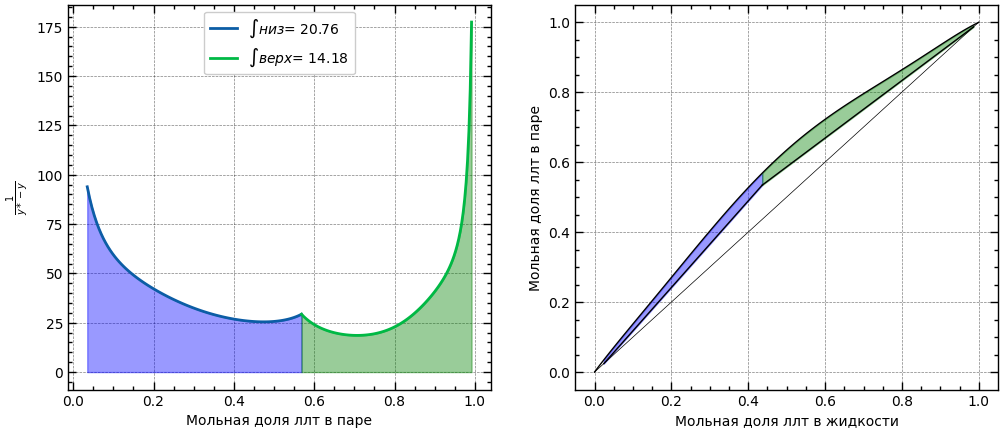

In [12]:
bottom, top = clc.get_transfer_numbers(balance, Ropt, xy_diagram, plot_type='matplotlib')

Расчет ректиификационной колоны сводится к определению ее основных геометрических размеров - диаметра и высоты. Оба параметра в значительной мере определяются гидродинамическим режимом работы колоны, который, в свою очередь, зависит от скоростей и физических свойств фаз, а также от типа и размера насадки.
При расчете ректификационной установки приняты следующие допущения:
1. молярные теплоты испарения компонентов при одной и той же температуре приблизительно одинаковы (правило Трутона), поэтому каждый кМоль пара при конденсации испаряет 1 кМоль жидкости. Поэтому мольные потоки пара в любом сечении колонны постоянны;
2. в дефлегматоре не происходит изменения состава пара;
3. при испарении жидкости в кипятильнике не происходит изменения ее состава;
4. теплоты смешения компонентов разделяемой смеси равны нулю

В качестве насадки выбраны неупорядоченные кольца Рашига трех размеров по каталогу.

Диаметр колонны в графе 'стандартный размер обечайки' в метрах

In [13]:
diameter = clc.calculate_diameter(balance, Ropt, properties, filling_name='50x50x5')# насадки могут быть трех размеров '25x25x3' '35x35x4' '50x50x5'
diameter

массовая нагрузка жидкости верха          [8.943005332091285]
массовая нагрузка жидкости низа           [15.97604406769291]
массовый поток пара верха                [10.521507586131282]
массовый поток пара низа                 [12.596748252184563]
предельная скорость пара верха           [2.8544432103817394]
предельная скорость пара низа            [2.3225662031857945]
рабочая скорость пара верха              [1.9981102472672174]
рабочая скорость пара низа                [1.625796342230056]
диаметр верха                             [2.319534548057392]
диаметр низа                             [2.5988446071645317]
стандартный размер обечайки                               2.6
действительная рабочая скорость верха    [1.5902830939406236]
действительная рабочая скорость низа     [1.6243517144801565]
% от предельной скорости верха            [55.71254975950097]
% от предельной скорости низа             [69.93780036289523]
dtype: object

ниже 'общая высота колонны' в метрах

In [14]:
hight = clc.calculate_hight(
    balance,
    properties,
    diameter,
    xy_diagram,
    bottom,
    top,
    Substance,
    Ropt,
    PRESSURE,
    filling_name='50x50x5')
hight

отношение нагрузок пар/жидкость верха              [1.2164502164502164]
отношение нагрузок пар/жидкость низа               [0.8081950358192826]
коэффициент диффузии жидкости верха при 20°С    [4.713544508560524e-09]
коэффициент диффузии жидкости низа при 20°С     [4.006799675489538e-09]
температурный коэффициент верха                                0.018946
температурный коэффициент низа                                 0.022299
коэффициент диффузии жидкости низа              [8.934914470635338e-09]
коэффициент диффузии жидкости верха             [8.986948246491954e-09]
коэффициент диффузии пара верха                                0.000011
коэффициент диффузии пара низа                                 0.000011
средний коэффициент распределения верха                        1.140754
средний коэффициент распределения низа                         1.353691
критерий Прандтля жидости верха                    [54.204121903049085]
критерий Прандтля жидкости низа                     [63.06125344

In [15]:
thermal_balance = clc.calculate_thermal_balance(balance, properties, Ropt)
thermal_balance

теплота забираемая водой в дефлегматоре     [10660.623985599621]
теплота передаваемая паром от испарителя             4772.301167
теплота исходной смеси                               1041.247835
теплота кубовой жидкости                              765.648266
теплота дистиллята                                    315.452567
теплота получаемая кипящей жидкостью         [10700.47698411418]
dtype: object

Для работы колонны необходимо правильно подобрать теплообменники, которые обеспечивают ток вещества. В подогревателе исходной смеси осуществляется нагрев смеси от FEED_TEMPERATURE до температуры кипения исходной смеси. Нагрев исходной смеси осуществляется за счет конденсации насыщенного водяного пара, давление пара 3 ата. Температура пара при таком давлении 132.9 ºС. Изменить давление и в след за ним все свойства теплоносителя можно в поле AQ_PRESSURE.

На тепловой карте зеленым цветом будет выделен теплообменник, характеристики которого позволяют в выбранных условиях обеспечивать запас поверхности теплообмена 5-20%.

По оси абсцисс отложена длинна трубы аппарата

По оси ординат:[диаметр внешнего кожуха; диаметр труб внутри кожуха; число ходов, число труб]

Подогреватель может располагаться вертикально и горизонтально. от выбора ориентации зависят некоторые коэффициенты теплообмена.

In [16]:
heaters_table = pd.read_excel('tables/Параметры кожухотрубчатых теплообменников и холодильников.xlsx',
                   header=[2])

exclude_list = ['d труб, мм']
heaters_table[exclude_list] = heaters_table[exclude_list].apply(eq.get_diameter)
heaters = eq.calculate_equipment(
    heaters_table,
    aqua_vapor_saturation_by_pressure,
    aqua_liquid_saturation,
    aqua_vapor_saturation,
    balance,
    properties,
    FEED_TEMPERATURE,
    thermal_balance,
    Ropt,
    EQ_NAME = 'подогреватель',
    ORIENTACION = 'вертикальный', #может быть 'горизонтальный'
    AQ_PRESSURE = 3) #можно поменять

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
            )
fig.show()

После того как аппарат выбран, можно получить его более развернутый рачсет вписав в поле 'row' номер ряда (сверху вниз начиная с 0), в поле 'name' длинну труб при выбранном AQ_PRESSURE

In [17]:
row = heaters_table.loc[17]
name = '3'

heater = eq.get_heater(row,
        name,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance, properties,
        FEED_TEMPERATURE,
        Ropt,
        ORIENTACION='вертикальный',
        AQ_PRESSURE=3, call='direct')

heater



cредняя движущая сила теплопередачи                  85.10426
тепловой поток в подогревателе                  750696.962196
расход пара на подогрев                            387.156762
критерий Рейнольдса                               6375.364209
критерий Прандтля                                    6.797132
коэффициент теплоотдачи в трубах                   390.567693
коэффициент теплопередачи в межтрубном            1042.221251
сумма термических сопротивлений                      0.000459
коэффициент теплопередачи                          251.320811
требуемая поверхность теплообмена                   35.098205
запас поверхности, %                      [38.42420171902391]
dtype: object

В испарителе испаряется жидкость из нижней части колонны (мольный состав паров аналогичен составу кубового остатка). В коржухотрубчатых испарителях в трубном пространстве кипит жидкость, а в межтрубном пространстве может быть жидкий, газообразный, парообразный, парогазовый или парожидкостной теплоноситель. Согласно ГОСТ 15119-79 эти теплообменники могут быть только ВЕРТИКАЛЬНЫМИ и ОДНОХОДОВЫМИ с трубками диаметром 25х2 мм.

In [18]:
evaporator_table = pd.read_excel('tables/Параметры кожухотрубчатых испарителей и конденсаторов по ГОСТ15119-79 и ГОСТ 5121-79.xlsx',
                   header=[2])

exclude_list = ['d труб, мм']
evaporator_table[exclude_list] = evaporator_table[exclude_list].apply(eq.get_diameter)
heaters = eq.calculate_equipment(
        evaporator_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'испаритель',
        AQ_PRESSURE = 3)

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
            )
fig.show()

In [19]:
row = evaporator_table.loc[3]
name = 4

evaporator = eq.get_evaporator(row,
            name,                  
            aqua_vapor_saturation_by_pressure, 
            aqua_liquid_saturation,
            aqua_vapor_saturation,
            properties,
            thermal_balance,
            AQ_PRESSURE = 3,
            call = 'direct')

evaporator

необходимый расход пара                                  [4.954612670331149]
cредняя движущая сила теплопередачи                                61.865954
коэффициент теплоотдачи от пара к трубам                       233256.009944
коэффициент теплоотдачи от труб к жидкости в трубах                 2.703683
сумма термических сопротивлений                                     0.000373
удельная тепловая нагрузка                               [59086.36345453817]
требуемая поверхность теплообмена                       [181.09892635967128]
запас поверхности, %                                   [-123.57892143169293]
dtype: object

В дефлегматоре конденсируются пары из верхней части колонны (мольный состав паров аналогичен составу дистилляту).

In [20]:
heaters = eq.calculate_equipment(
        heaters_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'дефлегматор',
        ORIENTACION = 'вертикальный', #Можно посчитать как 'горизониальный'
        AQ_PRESSURE = 3) #изменяемый параметр

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
    )
fig.show()

In [21]:
row = heaters_table.loc[17]
name = '2'

heater = eq.get_heater(row,
        name,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance, properties,
        FEED_TEMPERATURE,
        Ropt,
        HEATER_NAME = 'дефлегматор',
        ORIENTACION='вертикальный',
        AQ_PRESSURE=3, call='direct')

heater

cредняя движущая сила теплопередачи                  89.320859
тепловой поток в подогревателе                  1225008.721394
расход пара на подогрев                             631.773451
критерий Рейнольдса                               14937.953288
критерий Прандтля                                     4.855444
коэффициент теплоотдачи в трубах                   2355.364153
коэффициент теплопередачи в межтрубном              885.255058
сумма термических сопротивлений                       0.000459
коэффициент теплопередачи                           496.698434
требуемая поверхность теплообмена                    27.611722
запас поверхности, %                      [27.337572952165207]
dtype: object

В холодильнике дистиллята осуществляется охлаждение дистиллята до конечной температуры 'tk'. Температура технической воды на охлаждение 'aq_t' в разное время года может меняться от ~5 до ~20 °С. В переменную 'pipes' вводится выбор что пустить трубы, а что в межтрубное пространство. Как правило руководствуются корозионной активностью смеси и теплоносителя

In [22]:
heaters = eq.calculate_equipment(
        heaters_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'холодильник',
        COOLER_NAME = 'дистиллята',
        pipes = 'продукт', #изменяемый параметр может быть 'вода'.
        aq_t = 20, #изменяемый параметр
        tk = 30 #изменяемый параметр
        )

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
    )
fig.show()

В переменную 'pipes' вводится выбор что пустить трубы, а что в межтрубное пространство. Как правило руководствуются корозионной активностью смеси и теплоносителя

In [23]:
row = heaters_table.loc[13]
name = '3'
eq.get_cooler(
    row,
    name,
    aqua_liquid_saturation,
    aqua_vapor_saturation,
    properties,
    balance,
    COOLER_NAME = 'дистиллята',
    pipes = 'продукт', #изменяемый параметр может быть 'вода'. 
    aq_t = 20, #изменяемый параметр
    tk = 30, #изменяемый параметр
    call = 'direct')

тепловой поток в холодильнике                    169233.339599
расход воды                                            3.67909
cредняя движущая сила теплопередачи                  20.637132
площадь сечения межтруб                               0.045239
критерий Рейнольдса межтруб                        1622.296747
критерий Прандтля межтруб                             7.007475
коэффициент теплопередачи в межтрубном              816.010221
критерий Рейнольдса в трубах                       2262.890875
критерий Прандтля в трубах                            4.855444
коэффициент теплопередачи в трубах                  196.722841
сумма термических сопротивлений                       0.000459
коэффициент теплоотдачи                             147.756714
требуемая поверхность теплообмена                    55.499536
запас поверхности, %                      [20.714947919579174]
dtype: object

В холодильнике кубового остатка осуществляется охлаждение кубового остатка до конечной температуры 'tk'

In [24]:
heaters = eq.calculate_equipment(
        heaters_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'холодильник',
        COOLER_NAME = 'куба',
        pipes = 'продукт', #изменяемый параметр может быть 'вода'
        aq_t = 20, #изменяемый параметр
        tk = 30 #изменяемый параметр
        )

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
    )
fig.show()

In [25]:
row = heaters_table.loc[40]
name = '9'
eq.get_cooler(
    row,
    name,
    aqua_liquid_saturation,
    aqua_vapor_saturation,
    properties,
    balance,
    COOLER_NAME = 'куба',
    pipes = 'продукт',
    aq_t = 20,
    tk = 30,
    call = 'direct')

тепловой поток в холодильнике                    471184.205402
расход воды                                          10.243424
cредняя движущая сила теплопередачи                  25.114968
площадь сечения межтруб                               0.180956
критерий Рейнольдса межтруб                        1411.513767
критерий Прандтля межтруб                             7.007475
коэффициент теплопередачи в межтрубном              608.923866
критерий Рейнольдса в трубах                        415.364023
критерий Прандтля в трубах                            8.632434
коэффициент теплопередачи в трубах                   33.527815
сумма термических сопротивлений                       0.000459
коэффициент теплоотдачи                              31.321122
требуемая поверхность теплообмена                   598.991675
запас поверхности, %                      [21.700434652760904]
dtype: object

In [26]:
ph_organic

,name,formula,molar_mass,melting_point,boiling_point,critical_point,critical_pressure
0,Анилин,C6H5NH2,93.128,-5.9,184.4,426.0,5.309
1,Ацетон,CH3COCH3,58.080,-95.4,56.2,235.5,4.701
2,Бензол,C6H6,78.114,5.5,80.1,289.4,4.894
3,Бромбензол,C6H5Br,157.010,-30.8,156.0,397.0,4.519
4,Бутанол,CH3(CH2)2CH2OH,74.123,-89.5,117.3,288.6,4.418
5,Гексан,CH3(CH2)4CH3,86.177,-95.3,68.7,234.7,2.969
6,Гептан,CH3(CH2)5CH3,100.204,-90.6,98.4,267.0,2.736
7,Дихлорэтан,ClCH2CH2Cl,98.959,-35.9,83.5,288.0,5.369
8,Изопропанол,(CH3)2CHOH,60.096,-89.5,82.4,235.6,4.762
9,о-Ксилол,C6H4(CH3)2,106.167,-25.2,144.4,358.4,3.729
